## **INIT MAFA DATASET**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r /content/drive/My\ Drive/MAFA /content/

In [0]:
%cd /content/MAFA/
!unzip train-images.zip
!unzip MAFA-Label-Train.zip

In [0]:
!unzip test-images.zip
!unzip MAFA-Label-Test.zip

In [0]:
import scipy.io
matTrain = scipy.io.loadmat('/content/MAFA/LabelTrainAll.mat')
matTest = scipy.io.loadmat('/content/MAFA/LabelTestAll.mat')

In [0]:
print(matTrain.keys())
print(matTest.keys())

dict_keys(['__header__', '__version__', '__globals__', 'label_train'])
dict_keys(['__header__', '__version__', '__globals__', 'LabelTest'])


## **EXTRACT TRAIN SET**

In [0]:
#Read train
label_train = matTrain['label_train']
print(label_train.dtype)
print(label_train.shape,label_train.size)
print(label_train[0,0]['imgName'],label_train[0,0]['label'])
imgName = label_train[0]['imgName']
label = label_train[0]['label']

[('orgImgName', 'O'), ('imgName', 'O'), ('label', 'O')]
(1, 25876) 25876
['train_00000001.jpg'] [[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [0]:
print(imgName[0])
print(label[0])

['train_00000001.jpg']
[[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [0]:
n = [0,0,0,0]
for i in range(label.size):
  t = label[i][0][12]
  n[t]=n[t]+1
print(n)

[0, 12730, 11126, 2020]


In [0]:
#Write Train
import cv2
import numpy as np
import os 
pathIn = '/content/MAFA/train'
pathOut = '/content/MAFA-Crop/train'
numM1, numM2, numN = 0, 0, 0
index = 1
for i in range(label.size):
  img_name = os.path.join(pathIn, imgName[i][0])
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[y:y+int(h), x:x+int(w)]
  img_label = label[i][0][12]
  if img_label == 1:
    numM1 += 1
    if numM1 > 1000: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 1000: continue
    img_label = 'M'
  else: 
    numN += 1
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)
  

In [0]:
%cd /content/MAFA-Crop/train/
!ls
print(index)

## **EXTRACT TEST SET**

In [0]:
label_test = matTest['LabelTest']
print(label_test.dtype)
print(label_test.shape,label_test.size)
print(label_test[0,0]['name'],label_test[0,0]['label'])
imgName = label_test[0]['name']
label = label_test[0]['label']

[('name', 'O'), ('label', 'O')]
(1, 4935) 4935
['test_00000001.jpg'] [[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


In [0]:
print(imgName[0])
print(label[0])

['test_00000001.jpg']
[[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


In [0]:
n = [0,0,0,0]
for i in range(label.size):
  t = int(label[i][0][9])
  n[t]=n[t]+1
print(n)

[0, 2698, 1677, 560]


In [0]:
#Write Test
import cv2
import numpy as np
import os 
pathIn = '/content/MAFA/test'
pathOut = '/content/MAFA-Crop/test'
numM1, numM2, numN = 0, 0, 0 #Want test set has 1000 imgs
index = 1
for i in range(label.size):
  img_name = os.path.join(pathIn, imgName[i][0])
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[int(y):int(y)+int(h), int(x):int(x)+int(w)]
  img_label = int(label[i][0][9])
  if img_label == 1:
    numM1 += 1
    if numM1 > 250: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 250: continue
    img_label = 'M'
  else: 
    numN += 1
    if numN > 500: continue
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)

In [0]:
%cd /content/MAFA-Crop/test
!ls
print(index)

## **MOVE CROP DATA TO DRIVE**

In [0]:
!cp -r /content/MAFA-Crop /content/drive/My\ Drive

## **LOAD CROP DATA FROM DRIVE**

In [0]:
!apt update
!apt-get install zip

In [0]:
!cp -r /content/drive/My\ Drive/MAFA-Crop  /content/

## **IMPORT**

In [0]:
%tensorflow_version 1.x

In [0]:
!pip install Pillow
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 1.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3


In [0]:
# defines

DIR_IMG_TRAIN = '/content/drive/My Drive/MAFA-Crop/train/'
DIR_IMG_TEST = '/content/drive/My Drive/MAFA-Crop/test/'
DIR_TMP_DATA = '/content/drive/My Drive/Checkpoint/'
DIR_OUTPUT = '/content/drive/My Drive/MAFA-Crop/models/'

IMG_SHAPE = (150,150,3)

In [0]:
# imports

import os
import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import time

%matplotlib inline

## **EXPLORING THE DATA**

Image have shape: (91, 91, 3)


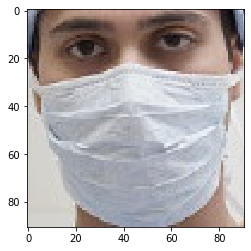

In [0]:
#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_1.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

Image have shape: (150, 150, 3)


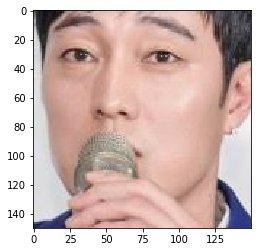

In [0]:
#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TRAIN,'N_1216.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

## **PREPROCESS DATA AND SPLIT TRAIN SET, VALID SET**

Using TensorFlow backend.


Mask #1 as image:


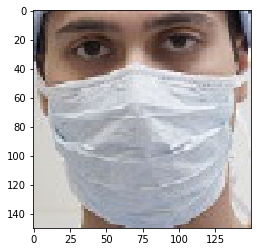

In [0]:
#PREPROCESSED DATA
# as long as images have different sizes, let's resize!

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def loadAndResizeImage (img, w, h):
    '''
    loads the image in 'img' path and returns a PIL image of size (w,h)
    '''
    return image.load_img (img, target_size=(w,h))

# Mask example resized
mask_index = 1
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_'+str(mask_index)+'.jpg')
sample_img = loadAndResizeImage (sample_img_path, IMG_SHAPE[0], IMG_SHAPE[1])
plt.imshow(sample_img)
print ('Mask #'+str(mask_index)+' as image:')

In [0]:
#GET LABEL
from PIL import Image

def getLabel (X):
    """
    Return the label for an element based on the filename: 
        mask -> 1 
        non_mask -> 0
    """
    if ('M' in X):
        return 1
    else:
        return 0
    
def getLabels (X):
    """
    Returns an array that contains the label for each X
    """
    return np.array([getLabel(X[i]) for i in range(len(X))])

def getLabelFromScore (score):
    """
    Returns the label based on the probability
    if score >= 0.5, return 'mask'
    else return 'non_mask'
    """
    if (score >=0.5):
        return 'M'
    else:
        return 'N'

def normalizedArrayFromImageInPath (image_path, img_shape):
    """
    returns an the image in 'image' path normalized in an np array
    """
    img = loadAndResizeImage (image_path, img_shape[0], img_shape[1])
    return image.img_to_array(img) / 255.

def loadResizeNormalizeImages (basepath, path_array, img_shape):
    """
    Loads the images from the path 
    and returns them in an array
    """
    images = np.empty ((len(path_array), img_shape[0], img_shape[1], img_shape[2]), dtype=np.float32)
    for i in range (len(path_array)):
        images[i] = normalizedArrayFromImageInPath (os.path.join(basepath,path_array[i]), img_shape)
    return images

In [0]:
#CREATE TRAINING AND VALIDATION SETS
import os
import numpy as np

train_imgs = os.listdir(DIR_IMG_TRAIN)
train_imgs.sort()

#TRAIN VALID TEST: 70 10 20 => TOTAL ~ 5000

#Training data have 3500 img
train_x = np.append(train_imgs[:1750],train_imgs[-1750:])
train_y = getLabels (train_x)

print ("Number of training examples = {}".format(len(train_x)))
print ("Number of training labels = {}".format(len(train_y)))

#Validation data have 500 img 
validation_x = np.append(train_imgs[1750:2000],train_imgs[-2000:-1750])
validation_y = getLabels (validation_x)

print ("Number of validation examples = {}".format (len(validation_x)))
print ("Number of validation labels = {}".format(len(validation_y)))

Number of training examples = 3500
Number of training labels = 3500
Number of validation examples = 500
Number of validation labels = 500


In [0]:
#CHECKPOINT 
img_train_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, train_x, IMG_SHAPE)
np.save (os.path.join(DIR_TMP_DATA,'train_x'), img_train_x)
print (img_train_x.shape)
print ('Input X for training saved!')

img_validation_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, validation_x, IMG_SHAPE)
np.save (os.path.join(DIR_TMP_DATA,'validation_x'), img_validation_x)
print (img_validation_x.shape)
print ('Input X for validation saved!')

print ('Checkpoint 1')

(3500, 150, 150, 3)
Input X for training saved!
(500, 150, 150, 3)
Input X for validation saved!
Checkpoint 1


In [0]:
#Save in drive
!cp /content/dataset/train_x.npy /content/drive/My\ Drive/Colab
!cp /content/dataset/validation_x.npy /content/drive/My\ Drive/Colab

In [0]:
#PROPORTION
def MaskVsNon_MaskProportion (labels):
    N = 0
    M = 0
    for label in labels:
        if (label == 1):
            M = M + 1
        else:
            N = N + 1

    N_percent = (N/len(labels))*100.0
    M_percent = 100.0 - N_percent

    return M_percent, N_percent

In [0]:
import numpy as np
img_train_x = np.load (os.path.join(DIR_TMP_DATA,'train_x')+'.npy')
img_validation_x = np.load (os.path.join(DIR_TMP_DATA,'validation_x')+'.npy')

M, N = MaskVsNon_MaskProportion (train_y)
print ("--> Training set: Non Mask represent "+str(N)+"% of the total")
print ("    Mask represent "+str(M))

M, N = MaskVsNon_MaskProportion (validation_y)
print ("--> Validation set: Non Mask represent "+str(N)+"% of the total")
print ("    Non Mask represent "+str(M))

--> Training set: Non Mask represent 50.0% of the total
    Mask represent 50.0
--> Validation set: Non Mask represent 50.0% of the total
    Non Mask represent 50.0


## **BUILDING THE MODEL**

In [0]:
#BUILDING THE MODEL
#Hide Warning tensorflow
#--------
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#---------
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150,150,3))

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
non_dense_predictions = Dense(1, activation='sigmoid')(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# add dropout
x = Dropout (0.5)(x)
# one fully connected layer more
x = Dense(256, activation='relu')(x)
# add dropout
x = Dropout (0.3)(x)
# one fully connected layer more
x = Dense(32, activation='relu')(x)
# and a logistic layer --
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

87916544/87910968 [==============================] - 8s 0us/step


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

## **TRAINING**

In [0]:
model.fit (x=img_train_x, y=train_y, 
           batch_size=16, epochs=10, 
           validation_data=(img_validation_x, validation_y))

Train on 3500 samples, validate on 500 samples
Epoch 1/10
3500/3500 [==============================] - 25s 7ms/step - loss: 0.5294 - acc: 0.7469 - val_loss: 0.2745 - val_acc: 0.8960
Epoch 2/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.3638 - acc: 0.8466 - val_loss: 0.2562 - val_acc: 0.9120
Epoch 3/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.3222 - acc: 0.8640 - val_loss: 0.2554 - val_acc: 0.9180
Epoch 4/10
3500/3500 [==============================] - 16s 5ms/step - loss: 0.3218 - acc: 0.8723 - val_loss: 0.6494 - val_acc: 0.8020
Epoch 5/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.3028 - acc: 0.8800 - val_loss: 0.2451 - val_acc: 0.9040
Epoch 6/10
3500/3500 [==============================] - 16s 5ms/step - loss: 0.2837 - acc: 0.8857 - val_loss: 0.3075 - val_acc: 0.9240
Epoch 7/10
3500/3500 [==============================] - 16s 4ms/step - loss: 0.2928 - acc: 0.8771 - val_loss: 0.4161 - val_acc: 0.8660
Epoch 8/

## **SAVING AND LOADING KERAS MODEL**

In [0]:
#Save model
print ('Saving the model...')
model.save(os.path.join(DIR_OUTPUT,'model-10ep.h5'))
print ('Model saved! Filename: {}'.format (os.path.join(DIR_OUTPUT,'model-10ep-.h5')))
print ('Checkpoint 2')

Saving the model...
Model saved! Filename: /content/drive/My Drive/MAFA-Crop/models/model-10ep-.h5
Checkpoint 2


In [0]:
#Load model
from keras.models import load_model
#model = load_model(os.path.join(DIR_TMP_DATA,'model-10ep.h5'))
model = load_model('/content/drive/My Drive/MAFA-Crop/models/model-10ep.h5')
print ('Model loaded!')

Model loaded!


## **EVALUATION**

In [0]:
# Evaluation with test images the model didn't see before

#Test set original have 500 img

test_imgs = os.listdir(DIR_IMG_TEST)
test_imgs.sort
test_x = np.append(test_imgs[:500],test_imgs[-500:])
test_y = getLabels (test_x)

print ("Number of test set images= "+str(len(test_x)))
print ("Number of test set labels = "+str(len(test_y)))

print ("First element of test set "+test_x[0])
print ("Label of first element of test set = "+str(test_y[0]))

Number of test set images= 1000
Number of test set labels = 1000
First element of test set M_1.jpg
Label of first element of test set = 1


In [0]:
print(test_x)

In [0]:
img_test_x = loadResizeNormalizeImages (DIR_IMG_TEST, test_x, IMG_SHAPE)
print (img_test_x.shape)

(1000, 150, 150, 3)


In [0]:
print ('Saving test set...')
np.save (os.path.join(DIR_TMP_DATA,'test_x'), img_test_x)
print ('Input X for test saved!')
print ('Checkpoint 3')

Saving test set...
Input X for test saved!
Checkpoint 3


In [0]:
#Save in drive
!cp -r /content/Checkpoint /content/drive/My\ Drive/

In [0]:
img_test_x = np.load (os.path.join(DIR_TMP_DATA,'test_x')+'.npy')
print ('Input X for evaluation loaded!')

# check the proportion organic vs recyclable
M, N = MaskVsNon_MaskProportion (test_y)

print ("--> Test set: Non Mask represent "+str(N)+"% of the total")
print ("    Mask represent "+str(M)+"%")

Input X for evaluation loaded!
--> Test set: Non Mask represent 50.0% of the total
    Mask represent 50.0%


In [0]:
preds = model.evaluate (x=img_test_x, y=test_y, batch_size=10)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1000/1000 [==============================] - 2s 2ms/step

Loss = 0.5346075860979818
Test Accuracy = 0.8589999970793724


## **PREDICT**

In [0]:
def predictFromPath (img_path, img_size=(150,150)):
    img = normalizedArrayFromImageInPath (img_path, img_size)
    return predictFromImg (img)

def predictFromImg (img):
    x = np.expand_dims(img, axis=0)
    return model.predict(x)[0][0]

In [0]:
%cd /content/MAFA-Crop/test
!ls

Prediction took 0.052 seconds
It's a N! (with a score of 0.07839389145374298) 0 -> Non Mask / 1 -> Mask


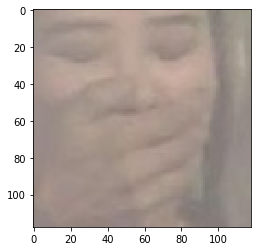

In [0]:
img_path = DIR_IMG_TEST+'N_776.jpg'
display_img = image.load_img(img_path)
start = time.time()
score = predictFromPath (img_path)
end = time.time()
print("Prediction took {:.3f} seconds".format (end - start))
print("It's a {}! (with a score of {}) 0 -> Non Mask / 1 -> Mask".format (getLabelFromScore (score), score))
plt.imshow(display_img)


In [0]:
import numpy as np
import cv2
img_path = DIR_IMG_TEST+'N_776.jpg'
display_img = image.load_img(img_path)
img = np.array(display_img)
img = cv2.resize(img,(150,150))
img = img/255.0
score = predictFromImg(img)
print(score)


0.108090445


## **CONFUSION MATRIX**

In [0]:
predict_y = model.predict(x=img_test_x, batch_size=16)
pred_y = [getLabelFromScore(pred) for pred in predict_y]
pred_y = getLabels(pred_y)

Confusion matrix, without normalization
[[483  17]
 [124 376]]
Normalized confusion matrix
[[0.97 0.03]
 [0.25 0.75]]


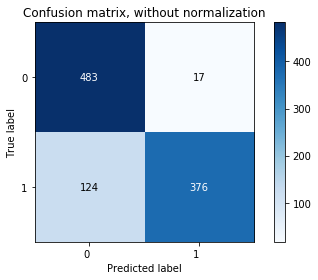

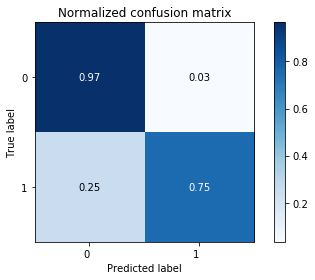

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = ['recyclable', 'organic']
# Plot non-normalized confusion matrix
plot_confusion_matrix(test_y, pred_y, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(test_y, pred_y, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## **PRECISION + RECALL CURVE**

In [0]:
from __future__ import print_function
import numpy as np 
# confusion matrix to precision + recall
def cm2pr_binary(cm):
    p = cm[0,0]/np.sum(cm[:,0])
    r = cm[0,0]/np.sum(cm[0])
    return (p, r)

cm = confusion_matrix(test_y, pred_y)
p,r = cm2pr_binary(cm)
print("precision = {0:.2f}, recall = {1:.2f}".format(p, r))

precision = 0.80, recall = 0.97


In [0]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_y, predict_y)

print('Average precision score: {0:0.2f}'.format(
      average_precision))

Average precision score: 0.95


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

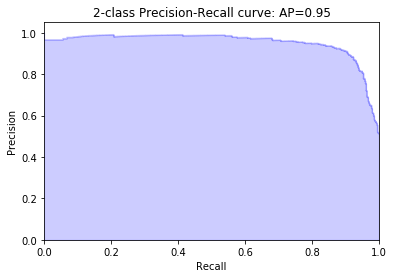

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(test_y, predict_y)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

## **F1-SCORE**

In [0]:
from sklearn import metrics
f1_score = metrics.f1_score(test_y , pred_y)
print('F1_score: ',f1_score)

F1_score:  0.8421052631578948


## **ROC + AUC**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [0]:
auc = roc_auc_score(test_y, predict_y)
print('AUC: %.2f' % auc)

AUC: 0.95


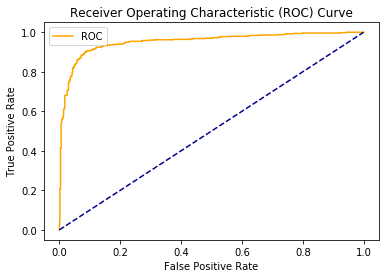

In [0]:
fpr, tpr, thresholds = roc_curve(test_y, predict_y)
plot_roc_curve(fpr, tpr)